# Reading And loding datasets

In [1]:
import os
import autokeras as ak
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image

In [43]:
# Image preprocessing
batch_size = 32
img_height = 180
img_width = 180
from tensorflow.keras.preprocessing import image
def img_preprocess(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path)
    input_arr = keras.preprocessing.image.img_to_array(image,size=(180, 180, 3))
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    return input_arr
def preprocess(path):
    img_data = np.random.random(size=(180, 180, 3))
    img = tf.keras.preprocessing.image.array_to_img(img_data)
    array = tf.keras.preprocessing.image.img_to_array(img)
    return array
def preprocess1(img):
    img = image.array_to_img(img, scale=False)
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))
    img = image.img_to_array(img)
    return img / 255.0

In [3]:
datadir = 'D:\\Images\\flowers'

labels = [] # Image Categories

for category in os.listdir(datadir):
    labels.append(category)

# for category in labels:
#     path = os.path.join(datadir,category)
#     class_num = labels.index(category)
# #     print(path)
#     for img in os.listdir(path):
#         img_path = os.path.join(path,img)
# #         print(img_path)
#         image = preprocess(img_path)
#         image.append(image)

print(labels)

['bougainvillea', 'gardenias', 'garden_roses', 'hibiscus', 'hydrangeas', 'lilies', 'orchids', 'peonies', 'sunflower', 'tulip']


In [4]:
# img = 'D:\\Images\\flowers\\bougainvillea\\bougainvillea_00002.jpg'
# a = preprocess(img)
# a.shape

In [5]:
# preprocess image from directory
batch_size = 32
img_height = 180
img_width = 180

train_data = ak.image_dataset_from_directory(
    datadir,
    # Use 20% data as testing data.
    validation_split=0.2,
    subset="training",
    # Set seed to ensure the same split when loading testing data.
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_data = ak.image_dataset_from_directory(
    datadir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 733 files belonging to 10 classes.
Using 587 files for training.
Found 733 files belonging to 10 classes.
Using 146 files for validation.


In [6]:
# Store labels in json file
import json
data = {"flowers": labels}

with open('flower.json', 'w') as jsonfile:
    json.dump(data, jsonfile)

In [7]:
data = []
labels = []
for data, labels in train_data:
    print(data.shape)  # (64, 200, 200, 3)
    print(data.dtype)  # float32
    print(labels.shape)  # (64,)
    print(labels.dtype)  # int32

(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype: 'float32'>
(32,)
<dtype: 'string'>
(32, 180, 180, 3)
<dtype

In [8]:
# for images, labels in train_data:
#     print(labels)

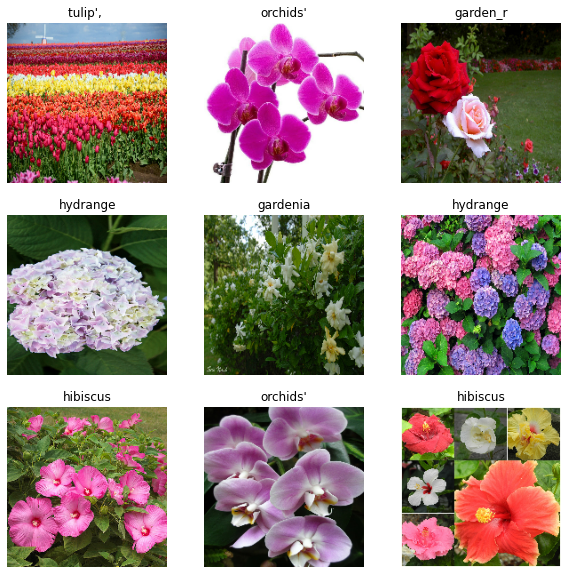

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(labels[i])[12:20])
        plt.axis("off")

In [10]:
# for images,labels in train_ds:
#     print((int(labels[i])),(int(labels[i+1])),(int(labels[i+2])),(int(labels[i+3])),(int(labels[i+4])),
#           (int(labels[i+5])),(int(labels[i+6])),(int(labels[i+7])),(int(labels[i+8])),(int(labels[i+9])),(int(labels[i+10])))

In [11]:
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
history = clf.fit(train_data, epochs=20)

Trial 1 Complete [00h 28m 15s]
val_loss: 1.7730629444122314

Best val_loss So Far: 1.7730629444122314
Total elapsed time: 00h 28m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
19/19 [==============================] - 104s 5s/step - loss: 6.8009 - accuracy: 0.1993
Epoch 2/20
19/19 [==============================] - 104s 5s/step - loss: 1.7582 - accuracy: 0.4702
Epoch 3/20
19/19 [==============================] - 103s 5s/step - loss: 0.8766 - accuracy: 0.7751
Epoch 4/20
19/19 [==============================] - 97s 5s/step - loss: 0.2595 - accuracy: 0.9421
Epoch 5/20
19/19 [==============================] - 98s 5s/step - loss: 0.0993 - accuracy: 0.9898
Epoch 6/20
19/19 [==============================] - 104s 5s/step - loss: 0.0435 - accuracy: 1.0000
Epoch 7/20
19/19 [==============================] - 98s 5s/step - loss: 0.0133 - accuracy: 1.0000
Epoch 8/20
19/19 [==============================] - 98s 5s/step - loss: 0.0050 - accuracy: 1.0000
Epoch 9/20
19/19 [======================

In [12]:
clf.predict(test_data)

array([['hibiscus'],
       ['lilies'],
       ['hydrangeas'],
       ['peonies'],
       ['orchids'],
       ['garden_roses'],
       ['peonies'],
       ['gardenias'],
       ['sunflower'],
       ['bougainvillea'],
       ['tulip'],
       ['sunflower'],
       ['bougainvillea'],
       ['garden_roses'],
       ['tulip'],
       ['garden_roses'],
       ['orchids'],
       ['tulip'],
       ['tulip'],
       ['bougainvillea'],
       ['peonies'],
       ['lilies'],
       ['hydrangeas'],
       ['peonies'],
       ['peonies'],
       ['garden_roses'],
       ['sunflower'],
       ['hydrangeas'],
       ['hydrangeas'],
       ['bougainvillea'],
       ['tulip'],
       ['peonies'],
       ['lilies'],
       ['hibiscus'],
       ['hydrangeas'],
       ['tulip'],
       ['hibiscus'],
       ['hydrangeas'],
       ['hibiscus'],
       ['bougainvillea'],
       ['garden_roses'],
       ['garden_roses'],
       ['gardenias'],
       ['bougainvillea'],
       ['gardenias'],
       ['garden

In [13]:
y_pred = clf.evaluate(test_data)
print(y_pred)

5/5 [==============================] - 5s 1s/step - loss: 1.9060 - accuracy: 0.5753
[1.9059919118881226, 0.5753424763679504]


In [14]:
# y_prediction = clf.predict(test_data)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_pred=y_prediction, y_true=y_test)

In [15]:
model = clf.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>
model.save("flower_model_autokeras.h5")


<class 'tensorflow.python.keras.engine.functional.Functional'>


In [28]:
from tensorflow.keras.models import load_model

loaded_model = load_model("flower_model_autokeras.h5", custom_objects=ak.CUSTOM_OBJECTS)

predicted_y = loaded_model.predict(test_data,-1)
print(len(predicted_y[1]))
predicted_y[0]

10


array([1.4462691e-03, 4.2382246e-03, 4.2543653e-09, 5.7922703e-01,
       4.0502310e-02, 3.4493015e-03, 6.6136144e-02, 1.1303199e-01,
       7.0613930e-07, 1.9196808e-01], dtype=float32)

In [45]:
img = 'D:\\Images\\flowers\\bougainvillea\\bougainvillea_00002.jpg'
a = preprocess1(img)
clf.predict(a)

ValueError: could not convert string to float: 'D:\\Images\\flowers\\bougainvillea\\bougainvillea_00002.jpg'

In [47]:
clf.summary

AttributeError: 'ImageClassifier' object has no attribute 'summary'

In [48]:
loaded_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 180, 180, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 180, 180, 3)       7         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 88, 88, 64)       